(a) (i)\
The Null Hypothesis we wish to test is about linear combinations of linear regression coefficients written as a system of linear equations:
$$
H_0 :R\beta = r
$$
where values of $R$ and $r$ are known and specified by the hypothesis. We denote the number of equations, which is the dimension of r, by #$r$. So $R$ is #$r$ × $K$ . These #$r$ equations are restrictions on the coefficients in the maintained hypothesis. It is called a linear hypothesis because each equation is linear. To make sure that there are no redundant equations and that the equations are consistent with each other, we require that $rank(R)= $#$r$. 


(ii)\
Under the null hypothesis $H0 : R\beta = r$, where $R$ is #$r$ are introduced above, the F statistic is defined as

$$
F = \frac{(Rb-r)'[R(X'X)^{-1}R']^{-1}(Rb-r)/\text{#}r}{s^2} = (Rb-r)'[R\widehat{Var(b|X)}R']^{-1}(Rb-r)/\text{#}r,
$$
where $\widehat{Var(b|X)} = s^2(X'X)^{-1}$. If the null hypothesis $R\beta = r$ is true, we expect $Rb − r$ to be small, so large values of F should be taken as evidence for a failure of the $H_0$. This means that we look at only the upper tail of the distribution in the F-statistic. General steps of F-test at the significance level of $\alpha$ is as follows. \
STEP 1: Calculate the F statistic by the above formula.\
STEP 2: Go to the table of F distribution and look up the degrees of freedom $p-1$ and $n − p$. Find the critical value $F_{\alpha}(p-1, n − p)$ that leaves $\alpha$ for the upper tail of the F distribution. For example, when $p = 4,
n − p = 30$, and $\alpha$ = 5\%, the critical value is 2.92.\
STEP 3: Accept the null if the F statistic from Step 1 is less than $F_{\alpha}(p-1, n−p)$. Reject otherwise.

(b)\
Using F-ratio test, since

In this case,
$$
R = 
 \begin{bmatrix}
  0 & 1 & 0 & 0 &...&0
  \\0 & 0 & 1 & 0 &...&0
  \\ &...&...&...&...&
  \\0 & 0 &...& 0 & 1 & 0
  \\0 & 0 &...& 0 & 0 & 1
 \end{bmatrix}
$$

where #$r = p-1, r = [0 ... 0]'$

then calculate the F statistic mentioned above:

$$
F_{p-1,n-p} =(Rb)'[R\widehat{Var(b|X)}R']^{-1}(Rb)/p-1
$$

Find the critical value for a given significance level, compare to decide whether to reject the hypothesis. 


(c)\
The assumpstions are:
1. Linearity: $y = X\beta + \epsilon$
2. Strict Exogeneity:$\mathbb{E}[\epsilon|X] = 0$
3. X has full rank
4. Spherical Errors: $\mathrm{var}[\epsilon|X] = \sigma^2I_n$
5. Normality of the error term: The distribution of $\epsilon$ conditional on $X$ is jointly normal.
To prove 

$$
F|X,H_0 \in F_{d,n−p}
$$

is equivalently to prove:

$$
F_{d,n-p} = \frac{w/d}{q/(n-p)} \in F_{d,n−p}
$$

where $w = (Rb-r)'[\sigma^2 R(X'X)^{-1}R']^{-1}(Rb-r)$  and  $q=\frac{e'e}{\sigma^2}$

We need to show\
(i) $w | X ∼ \chi^2(d)$

(ii) $q | X ∼ \chi^2(n - p)$ (already know)

(iii) $w$ and $q$ are independently distributed conditional on X.

(i) Let $v = Rb−r$. Under $H_0, Rb−r = R(b−\beta)$. So by 

$$
(b-\beta)|X \in N(0,\sigma^2(X′X)^{−1})
$$

$v$ is normal with mean 0, and its variance is given by

$$
Var(v | X) = Var(R(b − \beta) | X) = R Var(b − \beta | X)R′ = \sigma^2  R(X′X)^{−1}R′
$$

which is none other than the inverse of the middle matrix in the quadratic form for $w$. Hence, $w$ can be written as $v'Var(v|X)^{-1}v$. Since $R$ is of full row rank and $X′X$ is nonsingular, $\sigma^2 R(X'X)^{−1}R′$ is nonsingular.Therefore, by the definition of the $\chi^2$ distribution, $w|X \in \chi^2(d)$

(iii) $w$ is a function of $b$, and $q$ is a function of $e$. But $b$ and $e$ are independently distributed conditional on $X$.So $w$ and $q$ are independently distributed conditional on $X$.

Q2.

In [4]:
# (a) 
import pandas as pd 
import numpy as np 

ff5_path = './datasets/F-F_Research_Data_5_Factors_2x3.csv'
equityPrice_path = './datasets/QMNIX.csv'
ff5 = pd.read_csv(ff5_path, dtype={'Month':str})
ff5 = ff5.dropna()
equityPrice = pd.read_csv(equityPrice_path,usecols=['Date', 'Adj Close']).rename(columns={'Adj Close':'AdjClose'})
equityPrice.Date = equityPrice.Date.apply(lambda x:''.join(x.split('-')))
equityPrice['Date'] = equityPrice.Date.apply(lambda x:x[:-2])
equityPrice = equityPrice.dropna()
months = equityPrice["Date"].unique().tolist()
Ret = {}
for month in months:
    if month in [months[0], months[-1]]:
        continue
    this_month = equityPrice[equityPrice["Date"] == month]
    preMonth = [i for i in months if int(i) < int(month)][-1]
    pre_month = equityPrice[equityPrice["Date"] == preMonth]
    first = pre_month["AdjClose"].iloc[-1]
    last = this_month["AdjClose"].iloc[-1]
    Ret[month] = np.log(last/first)
ff5['RET'] = ff5.Month.apply(lambda x:Ret[x] if x in Ret else np.nan) - ff5.RF/100
ff5 = ff5[['Month','Mkt-RF','SMB','HML','RMW','CMA','RET']]
ff5 = ff5.dropna().reset_index(drop=True)
ff5

,Month,Mkt-RF,SMB,HML,RMW,CMA,RET
0,201411,2.55,-2.28,-3.09,1.50,0.27,0.025342
1,201412,-0.06,2.86,2.27,-1.22,0.96,0.019291
2,201501,-3.11,-0.92,-3.58,1.61,-1.65,0.028559
3,201502,6.13,0.32,-1.86,-1.12,-1.82,-0.007797
4,201503,-1.12,3.07,-0.37,0.09,-0.52,0.004880
...,...,...,...,...,...,...,...
100,202303,2.51,-6.94,-8.85,2.24,-2.37,-0.040088
101,202304,0.61,-2.56,-0.04,2.42,2.86,0.004352
102,202305,0.35,-0.38,-7.72,-1.81,-7.22,-0.017099
103,202306,6.46,1.34,-0.26,2.18,-1.62,0.031599


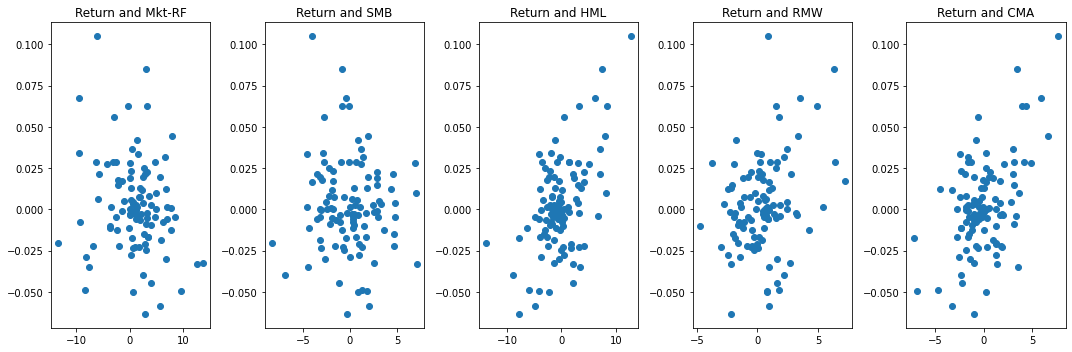

            Mkt-RF       SMB       HML       RMW       CMA       RET
mean      0.936857 -0.062952 -0.218857  0.399905  0.026381  0.002235
std       4.633003  2.818766  3.882251  2.089491   2.47615  0.028216
skew     -0.363298  0.104894  0.215404  0.680407  0.299725  0.624556
kurtosis  0.778178  0.298525  1.705845  1.155295  1.041707  1.511131
max          13.65      7.11     12.75       7.2      7.72   0.10495
min         -13.39     -8.28    -13.87     -4.75     -7.22 -0.063382
          Mkt-RF       SMB       HML       RMW       CMA       RET
Mkt-RF  1.000000  0.297566  0.017725  0.109447 -0.222795 -0.181686
SMB     0.297566  1.000000  0.312534 -0.365159  0.005525 -0.061926
HML     0.017725  0.312534  1.000000  0.161218  0.657891  0.539852
RMW     0.109447 -0.365159  0.161218  1.000000  0.189028  0.285867
CMA    -0.222795  0.005525  0.657891  0.189028  1.000000  0.501940
RET    -0.181686 -0.061926  0.539852  0.285867  0.501940  1.000000


In [5]:
# (b)
from scipy.stats import skew, kurtosis 
import matplotlib.pyplot as plt

# scatter plots
cols = ff5.columns.tolist()
cols.remove('Month')
cols = ff5.columns.tolist()
cols.remove('Month')
_, axes = plt.subplots(1, 5, figsize=(15,5))
ret = ff5['RET']
for i in range(len(cols[:-1])):
    x = ff5[cols[i]]
    axes[i].scatter(x, ret)
    axes[i].set_title(f"Return and {cols[i]}")
plt.tight_layout()
plt.show()

# Stats table
Stats = pd.DataFrame(columns=cols, index=['mean','std','skew','kurtosis','max','min'])
for col in Stats.columns:
    Stats.loc['mean',col] = np.mean(ff5[col])
    Stats.loc['std',col] = np.std(ff5[col])
    Stats.loc['skew',col] = skew(ff5[col])
    Stats.loc['kurtosis',col] = kurtosis(ff5[col])
    Stats.loc['max',col] = np.max(ff5[col])
    Stats.loc['min',col] = np.min(ff5[col])
corrMat = ff5[cols].corr()
print(Stats)
print(corrMat)
# From the results, we can see that
# RMW and Return are heavily skewed
# HML and CMA are highly correlated
# HML and CMA are positively correlated with excess return

In [6]:
# (c)
# Regression
import statsmodels.api as sm

X = sm.add_constant(ff5[['Mkt-RF','SMB','HML','RMW','CMA']])
print(X)
model = sm.OLS(ff5['RET'], X)
result = model.fit()
print(result.summary())
coef_df = pd.DataFrame({"params": result.params,   
                        "t values": round(result.tvalues,3),   
                        "p values": round(result.pvalues,3)})
print(coef_df)
print('F statistic: ', "%.3f" % result.fvalue, 'R squared: ', "%.3f" % result.rsquared)

     const  Mkt-RF   SMB   HML   RMW   CMA
0      1.0    2.55 -2.28 -3.09  1.50  0.27
1      1.0   -0.06  2.86  2.27 -1.22  0.96
2      1.0   -3.11 -0.92 -3.58  1.61 -1.65
3      1.0    6.13  0.32 -1.86 -1.12 -1.82
4      1.0   -1.12  3.07 -0.37  0.09 -0.52
..     ...     ...   ...   ...   ...   ...
100    1.0    2.51 -6.94 -8.85  2.24 -2.37
101    1.0    0.61 -2.56 -0.04  2.42  2.86
102    1.0    0.35 -0.38 -7.72 -1.81 -7.22
103    1.0    6.46  1.34 -0.26  2.18 -1.62
104    1.0    3.21  2.86  4.13 -0.56  0.62

[105 rows x 6 columns]
                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     12.98
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.02e-09
Time:                        10:50:15   Log-Likelihood:          

(c)\
For the regression model, f statistic is 12.98, under 95% confidence level, F(5,99) = 2.306 < 12.98, so the $H_0$: $\beta_2=\beta_3=\dots=\beta_6 = 0$ is rejected. \
Under 95% confidence level, only HML is statistically different from 0. \
We can say that we cannot reject the null hypothesis that the intercept is statistically different from 0 since its p value is too large.

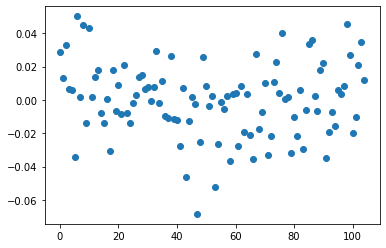

In [7]:
# (d)
residual = result.resid
plt.scatter(range(len(residual)),residual)
# error is unbiased and homoskedasticity

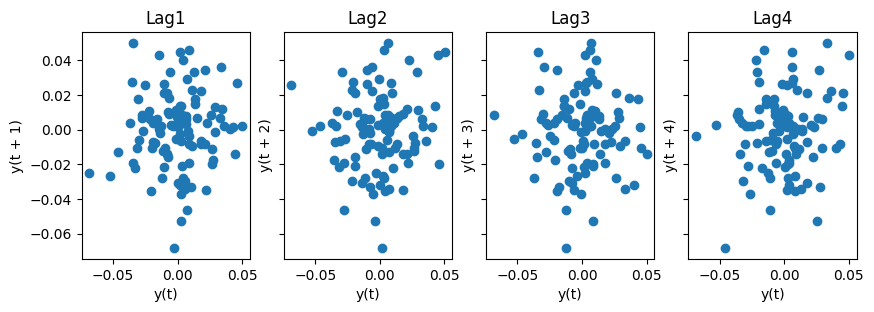

In [8]:
# (d)
from pandas.plotting import lag_plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i in range(4):
    lag_plot(residual,lag=i+1, ax=axes[i])
    axes[i].set_title(f'Lag{i+1}')
# no autocorrelation

array([[<AxesSubplot:xlabel='Mkt-RF', ylabel='Mkt-RF'>,
        <AxesSubplot:xlabel='SMB', ylabel='Mkt-RF'>,
        <AxesSubplot:xlabel='HML', ylabel='Mkt-RF'>,
        <AxesSubplot:xlabel='RMW', ylabel='Mkt-RF'>,
        <AxesSubplot:xlabel='CMA', ylabel='Mkt-RF'>],
       [<AxesSubplot:xlabel='Mkt-RF', ylabel='SMB'>,
        <AxesSubplot:xlabel='SMB', ylabel='SMB'>,
        <AxesSubplot:xlabel='HML', ylabel='SMB'>,
        <AxesSubplot:xlabel='RMW', ylabel='SMB'>,
        <AxesSubplot:xlabel='CMA', ylabel='SMB'>],
       [<AxesSubplot:xlabel='Mkt-RF', ylabel='HML'>,
        <AxesSubplot:xlabel='SMB', ylabel='HML'>,
        <AxesSubplot:xlabel='HML', ylabel='HML'>,
        <AxesSubplot:xlabel='RMW', ylabel='HML'>,
        <AxesSubplot:xlabel='CMA', ylabel='HML'>],
       [<AxesSubplot:xlabel='Mkt-RF', ylabel='RMW'>,
        <AxesSubplot:xlabel='SMB', ylabel='RMW'>,
        <AxesSubplot:xlabel='HML', ylabel='RMW'>,
        <AxesSubplot:xlabel='RMW', ylabel='RMW'>,
        <AxesSubplot

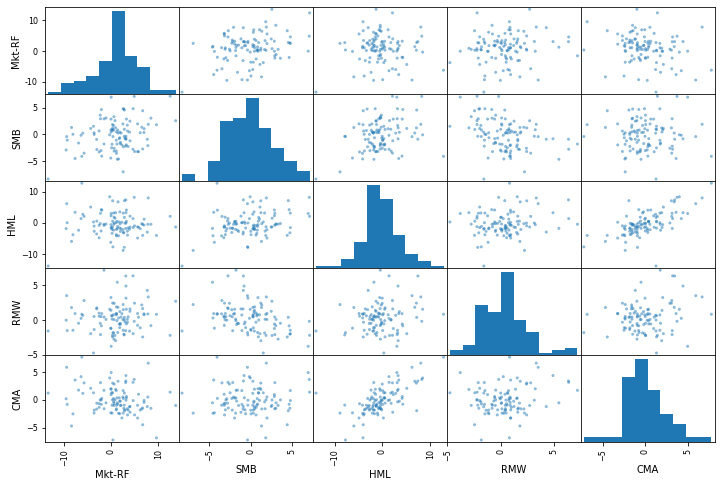

In [9]:
# (d)
from pandas.plotting import scatter_matrix
scatter_matrix(ff5[cols[:-1]], figsize=(12, 8))
# HML and CMA may be linearly dependent